# Funktionen schreiben in Python
Um eine Funktion in Python zu implementieren, kann diese entweder im laufenden Skript definiert werden, oder in einem gesonderten Dokument.b

In [3]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt

### 1. Grundstruktur einer Funktion
Eine Funktion wird eingeleitet durch den Befehl **def**. Danach folgt der Funktionsname. In Klammern werden dann alle Funktionsparameter definiert. Ein **:** eröffnet die eigentliche Funktion schließlich. Im Funktionsbereich selbst können nun verschiedene Operationen vorgenommen werden, bevor abschließend mit einem **return** Befehl ein Output erzeugt wird. 

### 2. Funktion im laufenden Skript
Um eine Funktion im laufenden Skript zu definieren wird diese einfach an die entsprechende Stelle geschrieben. Später kann sie dann über ihren Namen aufgerufen werden. Wichtig ist, dass die entsprechenden Parameter dann auch gefüllt werden.

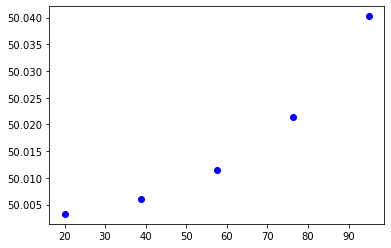

In [8]:
xcoords = np.linspace(20, 95, num = 5)

#die Funktion
def exponentialFUN(x, A, c, d):
    A = A*0.001
    return A*np.exp(c*x) + d

ycoords = exponentialFUN(x = xcoords, A = 1.67, c = 0.0335, d = 50)

plt.plot(xcoords, ycoords, "bo")

### 3. Funktion in einem externen Skript
Wird eine Funktion in einem externen Skript abgespeichert hat dass den Vorteil, dass die Funktion in mehreren Skripten immer wieder verwendet werden kann. Zudem ist die Struktur wesentlich übersichtlicher, gerade wenn die Funktion selbst sehr komplex ist. Vor allem im zweiteren Fall empfiehlt es sich die Funktion auch genau zu dokumentieren.
#### Funktionsdokumentation

In [9]:
def FUN(a, b):
    """
    Sehr kurze Beschreibung.
    
    Ausführlicherer Beschreibung.
    
    Parameters
    ----------
    a : Datentyp a
        Beschreibung a.
    b : Datentyp b
        Beschreibung b.
        
    Returns
    -------
    Was wird ausgegeben.
    
    """
    a = a+2
    
    return a+b

#### Funktion in einer Datei speichern
Die unten stehende Beispielfunktion wird in einer Datei mit dem Namen *FUN_ExtractWeatherSituation.py* gespeichert.

In [10]:
def weatherSituation(workingDir, filename, month):
    """
    Extract the weather situation from the DWD website format.
    
    The historic weather situation can be found here:
    https://www.dwd.de/DE/leistungen/wetterlagenklassifikation/online_wlkdaten.txt?view=nasPublication&nn=16102
    Its interpretation can be found here:
    https://www.dwd.de/DE/leistungen/wetterlagenklassifikation/kennzahlen_kennungen.html?nn=16102&lsbId=375412
    This function extracts first the year 2017 (research period of Master's thesis).
    Subsequently, one month is derived, containing the weather situation at a daily resolution.
    
    Parameters
    ----------
    workingDir : string
        The working directory
    filename : string
        The file name of the .txt DWD table
    month : number
        The number of the studied month. January is equivalent to 1 and so on
    
    Returns
    -------
    list with strings
    
    """
    #open the file
    with open(workingDir+filename) as weather:
        file = weather.readlines()
    #drop supplement information
    file = file[1:13]
    #extract the month row
    file = file[month-1]
    #split the list on every space
    weatherPerDay = file.split(" ")
    #drop remaining spaces
    weatherPerDay = list(filter(("").__ne__, weatherPerDay))
    #drop 0, as it indicates month with less than 31 days
    weatherPerDay = list(filter(("0").__ne__, weatherPerDay))
    #drop the date information and the last line break
    weatherPerDay = weatherPerDay[1:-1]
    
    return weatherPerDay    


#### Funktionsaufruf
Um die Funktion nun in einem anderen Skript aufzurufen müssen zwei Bedingungen erfüllt sein:
- Die Funktion muss mittels eines **import** Befehls geladen werden(üblicherweise oben in dem Bereich in dem auch die Bibliotheken geladen werden): *import FUN_ExtractWeatherSituation as ws*
- Das aktuelle **working directory** muss sich im selben Ordner befinden wie das hinterlegte Skript das die Funktion enthält: Im Ordner Masterarbeit_Skripte liegt das Funktionsskript, das im Arbeitsskript oben rechts eingestellte Working Directory ist auf den entsprechenden Ordner eingestellt (wird vereinfacht wenn Python Projekte verwendet werden, dort wird WD immer auf den gleichen Ordner gesetzt) 
Im eigentlichen Arbeitsskript kann dann (im Beispiel mit *ws*) die Funktion aufgerufen und ausgeführt werden. In diesem Fall wird die komplette Datei geladen und wir müssen noch spezifizieren, dass wir die entsprechende Funktion nutzen wollen. Der Funktionsaufruf würde daher *ws.weatherSituation()* lauten. Andererseits kann man direkt die eine Funktion über *from FUN_ExtractWeatherSituation import weatherSituation* laden. Der Funktionsaufruf würde dann nur weatherSituation() lauten.

Wurden Bibliotheken im Skript verwendet, müssen diese auch in der externen Datei geladen werden.

In [1]:
#example script 1 -----------------------------
import numpy as np
#from FUN_ExtractWeatherSituation import weatherSituation

#weatherSituation(a = a, b = b)

#example script 2 -----------------------------
import numpy as np
#import  FUN_ExtractWeatherSituation as ws

#ws.weatherSituation(a = a, b = b)